In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_excel('Cleaned_results.xlsx')
data = pd.DataFrame(data)

print(data)

            date home_team away_team  year  home  away  goal_margin
0     1879-01-18       EU1       EU3  1879     1    -1            1
1     1880-03-15       EU3       EU1  1880    -1     1            1
2     1881-02-26       EU1       EU3  1881    -1     1            1
3     1882-03-13       EU3       EU1  1882     1    -1            2
4     1883-02-03       EU1       EU3  1883     1    -1            5
...          ...       ...       ...   ...   ...   ...          ...
8760  2021-07-20       NA2       AS1  2021    -1     1            2
8761  2021-07-24       NA1       NA2  2021     1    -1            3
8762  2021-07-24       AS1       NA2  2021     1    -1            1
8763  2021-07-25       NA1       NA1  2021    -1     1            2
8764  2021-07-29       NA1       NA1  2021     1    -1            1

[8765 rows x 7 columns]


In [3]:
#sample analysis on AS2
use_AS2 = []
for k in range (len(data)):
    if data['home_team'][k] == 'AS2' and data['away_team'][k] not in ['AS1', 'AS2']:
        use_AS2.append(k)
for g in range (len(data)):
    if data['away_team'][g] == 'AS2' and data['home_team'][g] not in ['AS1', 'AS2']:
        use_AS2.append(g)
data_as2 = data.filter(items = use_AS2, axis = 0)
data_as2 = data_as2.replace(to_replace = r'^NA.$', value = 'North_America', regex = True)
data_as2 = data_as2.replace(to_replace = r'^EU.$', value = 'Europe', regex = True)
data_as2 = data_as2.replace(to_replace = r'^SA.$', value = 'South_America', regex = True)
data_as2 = data_as2.replace(to_replace = r'^AF.$', value = 'Africa', regex = True)
print(data_as2)

            date      home_team away_team  year  home  away  goal_margin
1655  1960-12-23            AS2    Africa  1960     1    -1            1
1955  1966-03-18            AS2    Africa  1966    -1     1            1
1957  1966-03-19            AS2    Africa  1966    -1     1            1
2078  1967-12-10            AS2    Africa  1967     1    -1            4
2245  1969-11-18            AS2    Europe  1969     0     0            0
...          ...            ...       ...   ...   ...   ...          ...
8340  2018-06-08         Europe       AS2  2018     1    -1            1
8361  2018-06-20  South_America       AS2  2018     1    -1            1
8413  2018-10-11  South_America       AS2  2018     1    -1            4
8414  2018-10-11  North_America       AS2  2018     0     0            0
8496  2019-06-07         Africa       AS2  2019     1    -1            2

[213 rows x 7 columns]


In [4]:
asia = []
opponent = []
match_status = []
for x in range (len(data_as2)):
    asia.append('AS2')
    if np.array(data_as2['home_team'])[x] == 'AS2':
        opponent.append(np.array(data_as2['away_team'])[x])
        match_status.append(np.array(data_as2['home'])[x])
    else:
        opponent.append(np.array(data_as2['home_team'])[x])
        match_status.append(np.array(data_as2['away'])[x])
        
as2 = pd.DataFrame(data = {'Asia_tier2' : asia, 'opponent' : opponent, 'match_status' : match_status, 'goal_margin' : np.array(data_as2['goal_margin']), 'year' : np.array(data_as2['year'])})

print(as2)

    Asia_tier2       opponent  match_status  goal_margin  year
0          AS2         Africa             1            1  1960
1          AS2         Africa            -1            1  1966
2          AS2         Africa            -1            1  1966
3          AS2         Africa             1            4  1967
4          AS2         Europe             0            0  1969
..         ...            ...           ...          ...   ...
208        AS2         Europe            -1            1  2018
209        AS2  South_America            -1            1  2018
210        AS2  South_America            -1            4  2018
211        AS2  North_America             0            0  2018
212        AS2         Africa            -1            2  2019

[213 rows x 5 columns]


In [5]:
#making sub-data-frame wrt opponent's region
as2_north_america = []
as2_europe =[]
as2_south_america =[]
as2_africa = []

for y in range (len(as2)):
    if opponent[y] == 'North_America':
        as2_north_america.append(y)
    elif opponent[y] == 'South_America':
        as2_south_america.append(y)
    elif opponent[y] == 'Europe':
        as2_europe.append(y)
    if opponent[y] == 'Africa':
        as2_africa.append(y)
#verifying
print(len(as2_africa) + len(as2_north_america) + len(as2_europe) + len(as2_south_america) )

213


In [6]:
#as2_vs_north_america 
as2_vs_north_america = as2.filter(items = as2_north_america, axis = 0)

#as2_vs_europe 
as2_vs_europe = as2.filter(items = as2_europe, axis = 0)

#as2_vs_south_america 
as2_vs_south_america = as2.filter(items = as2_south_america, axis = 0)

#as2_vs_africa 
as2_vs_africa = as2.filter(items = as2_africa, axis = 0)

as2_vs_north_america.to_excel("As_Tier2_vs_North_America.xlsx", index = False)
as2_vs_europe.to_excel("As_Tier2_vs_Europe.xlsx", index = False)
as2_vs_south_america.to_excel("As_Tier2_vs_South_America.xlsx", index = False)
as2_vs_africa.to_excel("As_Tier2_vs_Africa.xlsx", index = False)

    Asia_tier2 opponent  match_status  goal_margin  year
0          AS2   Africa             1            1  1960
1          AS2   Africa            -1            1  1966
2          AS2   Africa            -1            1  1966
3          AS2   Africa             1            4  1967
5          AS2   Africa             0            0  1972
..         ...      ...           ...          ...   ...
196        AS2   Africa            -1            1  2010
197        AS2   Africa             0            0  2012
198        AS2   Africa            -1            1  2012
206        AS2   Africa             1            2  2018
212        AS2   Africa            -1            2  2019

[109 rows x 5 columns]


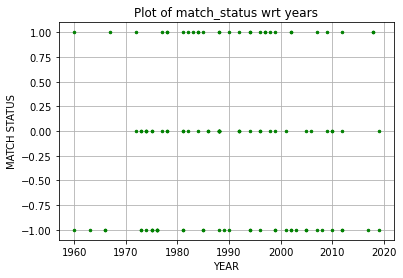

Text(0.5, 1.0, 'Histogram of match_status')

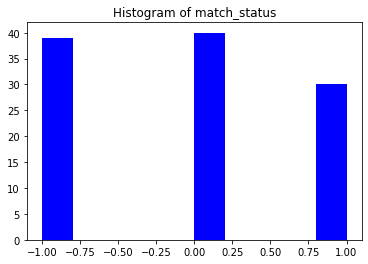

In [7]:
#checking
print(as2_vs_africa)

#plot as2_vs_africa
plt.plot(as2_vs_africa['year'], as2_vs_africa['match_status'], 'o-', ms = 2.5, color = 'green', linestyle = '')
plt.xlabel('YEAR')
plt.ylabel('MATCH STATUS')
plt.title('Plot of match_status wrt years')
plt.grid(True)
plt.show()

plt.hist(as2_vs_africa['match_status'], color = 'blue')
plt.title('Histogram of match_status')